In [1]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


605

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q="
# print(query)

In [80]:

weather_dict = []

# # Loop through the list of cities and perform a request for data on each
for city in cities[0:5]:
    
    #   Get weather data
    response = requests.get(query + city).json()
    time.sleep(1)
    
    try:
        # Get weather responses
        name = (response['name'])
        id = (response['id'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        speed = (response['wind']['speed'])
        country = (response['sys']['country'])
        dt = (response['dt'])
        print(f'City Name: {city}, ID: {id}' )
        
        # Append responses to dictionary keys     
        weather_dict.append({
        'City': name,
        'Lat' : lat,
        'Lon' : lon,
        'Temp' : temp,
        'Humidity' : humidity,
        'Cloudiness' : cloudiness,
        'Wind Speed' : speed,
        'Country' : country,
        'Date' : dt
        })
        weather_data = pd.DataFrame(weather_dict)
       
    
    except:             
        print(f"Key Error Ignore") 
        pass
    
weather_dict

# Write data to csv file 
import csv
fields = ['City', 'Lat', 'Lon', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
filename = "weather_data.csv"
with open(filename, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = fields)
    writer.writeheader()
    writer.writerows(weather_dict)
    

City Name: port alfred, ID: 964432
City Name: maues, ID: 3395062
City Name: kahului, ID: 5847411
City Name: vaini, ID: 4032243
City Name: rikitea, ID: 4030556


## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [32]:
# Create a data frame from from append lists

weather_data


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,292.61,74,0,4.45,ZA,1633704095
1,Maués,-3.3836,-57.7186,304.26,61,100,1.02,BR,1633704096
2,Kahului,20.8947,-156.4700,296.16,86,20,5.66,US,1633704038
3,Vaini,-21.2000,-175.2000,297.24,94,75,1.03,TO,1633704099
4,Rikitea,-23.1203,-134.9692,296.12,77,100,3.46,PF,1633704100
...,...,...,...,...,...,...,...,...,...
546,Howard Springs,-12.4970,131.0470,299.97,86,92,2.64,AU,1633704937
547,Ranau,5.9538,116.6641,295.51,91,100,0.94,MY,1633704939
548,Ust'-Uda,54.1742,103.0304,275.12,95,100,3.39,RU,1633704941
549,Loralai,30.3705,68.5980,298.97,13,0,7.54,PK,1633704942


In [33]:
weather_data.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.222035,21.708269,290.771960,69.794918,57.350272,3.383013,1.633704e+09
std,33.290227,90.962925,11.188617,21.355426,38.802001,2.450735,2.596519e+02
min,-54.800000,-175.200000,253.180000,5.000000,0.000000,0.000000,1.633704e+09
25%,-7.897350,-59.984750,282.930000,59.000000,18.000000,1.540000,1.633704e+09
50%,22.566700,25.570100,292.650000,75.000000,75.000000,2.900000,1.633704e+09
75%,48.986450,106.083350,299.575000,86.000000,96.000000,4.630000,1.633705e+09
max,78.218600,179.316700,314.690000,100.000000,100.000000,13.890000,1.633705e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

### # Get the indices of cities that have humidity over 100%.
#####BY DEFINITION, 100% humidity is as high as physically possible therefore no cities have a higher than 100% humidity.
But test just to be sure :

In [34]:
# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 100)]
# wet_weather

wet_weather
#  No cities report greater than 100% humidity

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

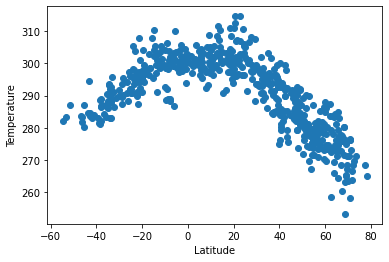

In [73]:
# Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('lat_vs_temp.png')
plt.show()

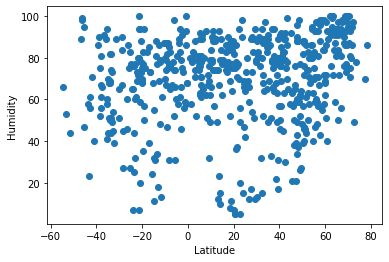

In [36]:
# Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_vs_humidity.png')
plt.show()

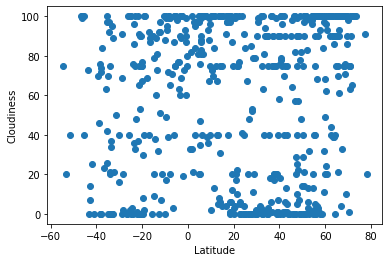

In [37]:
# Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

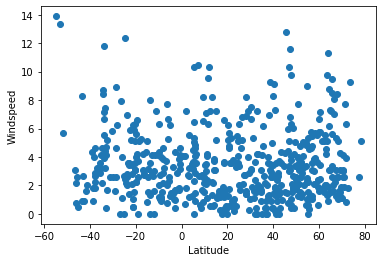

In [38]:
# Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [39]:
# Test whether city latitude is north (> 0) or south (< o)
# Put in North or South bins and do regression

weather_data['Hemisphere'] = ['North' if x > 0 else 'South' for x in weather_data['Lat']]
# weather_data

south_cities = weather_data[weather_data['Hemisphere'] == 'South']
north_cities = weather_data[weather_data['Hemisphere'] == 'North']


In [40]:
# NOT PART OF ASSIGNMENT - Get a look at Northern Hemisphere data
north_cities.describe()


,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,3.820000e+02
mean,38.566299,15.171062,289.028639,71.471204,57.806283,3.323115,1.633705e+09
std,20.553335,87.309616,12.234505,21.469088,39.569987,2.441976,2.570712e+02
min,0.700000,-173.300000,253.180000,5.000000,0.000000,0.000000,1.633704e+09
25%,20.566850,-67.598200,279.170000,62.000000,14.000000,1.502500,1.633704e+09
50%,40.128250,21.298900,290.840000,77.000000,75.000000,2.795000,1.633705e+09
75%,55.474725,87.346200,299.557500,88.000000,97.000000,4.630000,1.633705e+09
max,78.218600,179.316700,314.690000,100.000000,100.000000,12.750000,1.633705e+09


In [41]:
# NOT PART OF ASSIGNMENT - Get a look at Southern Hemisphere data
south_cities.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,-21.242517,36.484679,294.712485,66.005917,56.319527,3.518402,1.633704e+09
std,13.244781,97.384353,6.916773,20.661529,37.101433,2.472337,2.633806e+02
min,-54.800000,-175.200000,280.160000,7.000000,0.000000,0.000000,1.633704e+09
25%,-33.011700,-52.011700,289.200000,54.000000,20.000000,1.760000,1.633704e+09
50%,-20.408100,29.129500,295.530000,69.000000,70.000000,3.090000,1.633704e+09
75%,-9.656700,134.266700,299.660000,81.000000,90.000000,4.450000,1.633705e+09
max,-0.600000,176.083300,310.510000,100.000000,100.000000,13.890000,1.633705e+09


The r-squared is: 0.7577889782043926


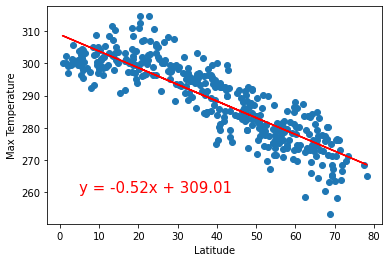

In [56]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression  *****EMPTY*****

x_values = north_cities['Lat']
y_values = north_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5875360874718316


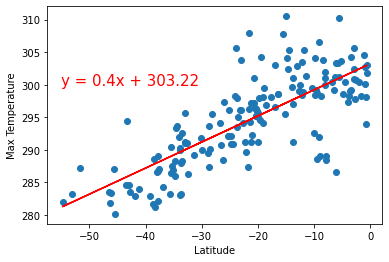

In [59]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.034685787324924215


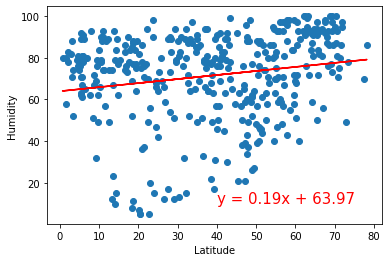

In [49]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression  *****EMPTY*****

x_values = north_cities['Lat']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00960809273097055


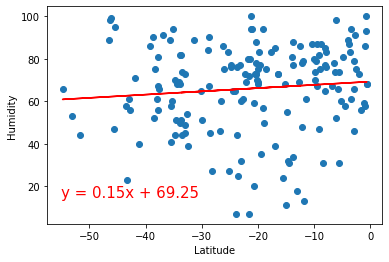

In [63]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0008372683098239015


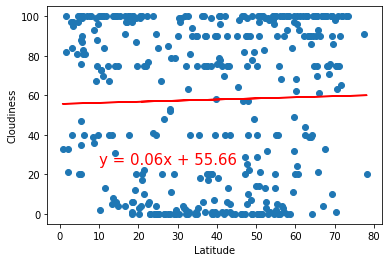

In [65]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.0841391372166722


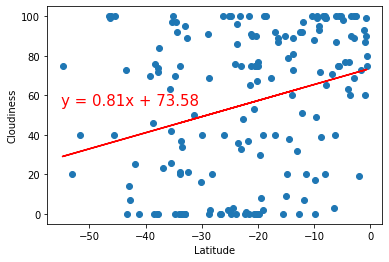

In [72]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004580227163720434


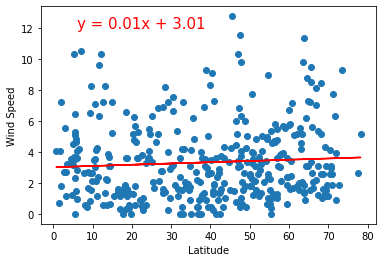

In [69]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.05818807302295085


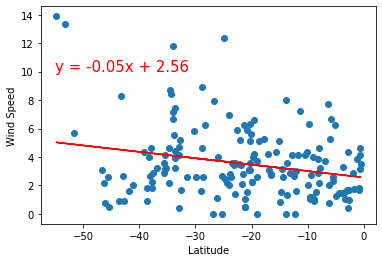

In [71]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()